In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib as mpl
from projet_6_bis_iteration_friendly import *

# --- Paramètres du domaine et numérique ---
nx, ny = 31, 31
Lx, Ly = 1.0, 1.0
dt = 1e-3  # à ajuster si ça diverge à grand Re/Ra

# --- Grilles de paramètres ---
U0_list = [1e-3]              # -> plusieurs Re
Ra_list = [1e4, 2e4, 4e4]                # -> plusieurs Ra

Nu_map = np.zeros((len(U0_list), len(Ra_list)))
Re_list = np.zeros(len(U0_list))
T_list = []

for i, U0 in enumerate(U0_list):
    for j, Ra in enumerate(Ra_list):
        Nu, Re, T = global_resolution(nx, ny, Lx, Ly, dt, U0, Ra)
        Nu_map[i, j] = Nu
        Re_list[i] = Re
        T_list.append(T)
        print(f"U0={U0:.3g} | Re={Re:.3e} | Ra={Ra:.1e} -> Nu={Nu:.4f}")


Le nombre de Courant est égale à : 2.9999999999999997e-05
Re = 100.0
Itération 0: Résidu w = inf, Résidu T = 1.21e-02
Itération 10: Résidu w = 8.40e-02, Résidu T = 9.43e-03


c:\Users\33672\Documents\Cours\Transfert num vf\Thermal-transfert\projet_6_bis_iteration_friendly.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  res_w.append(np.linalg.norm(w_new - w)/np.linalg.norm(w))


Itération 20: Résidu w = 3.70e-02, Résidu T = 7.54e-03
Itération 30: Résidu w = 2.31e-02, Résidu T = 6.18e-03
Itération 40: Résidu w = 1.74e-02, Résidu T = 5.20e-03
Itération 50: Résidu w = 1.48e-02, Résidu T = 4.47e-03
Itération 60: Résidu w = 1.33e-02, Résidu T = 3.91e-03
Itération 70: Résidu w = 1.24e-02, Résidu T = 3.47e-03
Itération 80: Résidu w = 1.17e-02, Résidu T = 3.12e-03
Itération 90: Résidu w = 1.11e-02, Résidu T = 2.83e-03
Itération 100: Résidu w = 1.05e-02, Résidu T = 2.60e-03
Itération 110: Résidu w = 9.98e-03, Résidu T = 2.39e-03
Itération 120: Résidu w = 9.45e-03, Résidu T = 2.22e-03
Itération 130: Résidu w = 8.95e-03, Résidu T = 2.07e-03
Itération 140: Résidu w = 8.47e-03, Résidu T = 1.94e-03
Itération 150: Résidu w = 8.02e-03, Résidu T = 1.83e-03
Itération 160: Résidu w = 7.59e-03, Résidu T = 1.73e-03
Itération 170: Résidu w = 7.20e-03, Résidu T = 1.63e-03
Itération 180: Résidu w = 6.83e-03, Résidu T = 1.55e-03
Itération 190: Résidu w = 6.49e-03, Résidu T = 1.48e-03


C:\Users\33672\AppData\Local\Temp\ipykernel_12708\1105203990.py:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = plt.imshow(


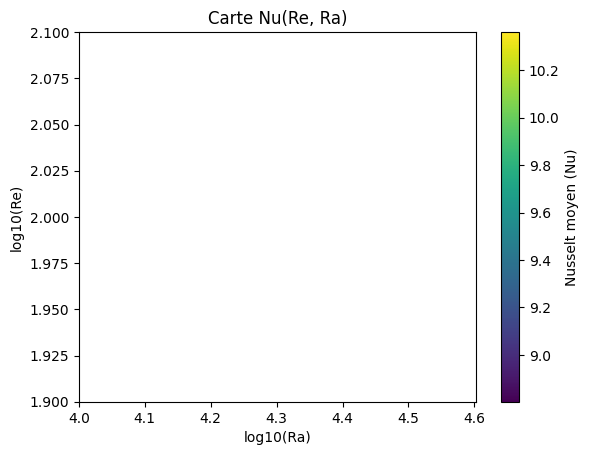

In [2]:
plt.figure()
# imshow a besoin d'un tableau 2D; on met Ra en x, Re en y
im = plt.imshow(
    Nu_map,
    aspect="auto",
    origin="lower",
    extent=[np.log10(Ra_list[0]), np.log10(Ra_list[-1]), np.log10(Re_list[0]), np.log10(Re_list[-1])]
)
plt.colorbar(im, label="Nusselt moyen (Nu)")
plt.xlabel("log10(Ra)")
plt.ylabel("log10(Re)")
plt.title("Carte Nu(Re, Ra)")
plt.show()


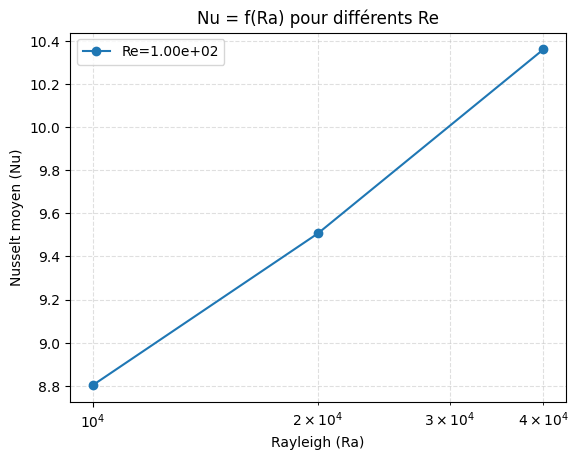

In [3]:
plt.figure()
for i, Re in enumerate(Re_list):
    plt.plot(Ra_list, Nu_map[i, :], marker="o", label=f"Re={Re:.2e}")

plt.xscale("log")
plt.xlabel("Rayleigh (Ra)")
plt.ylabel("Nusselt moyen (Nu)")
plt.title("Nu = f(Ra) pour différents Re")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.show()


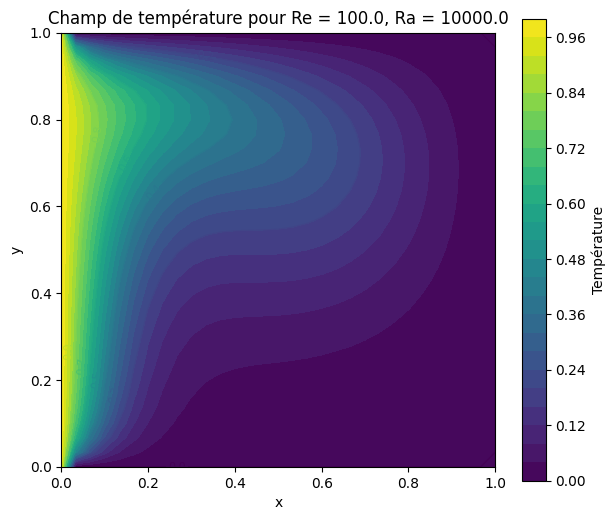

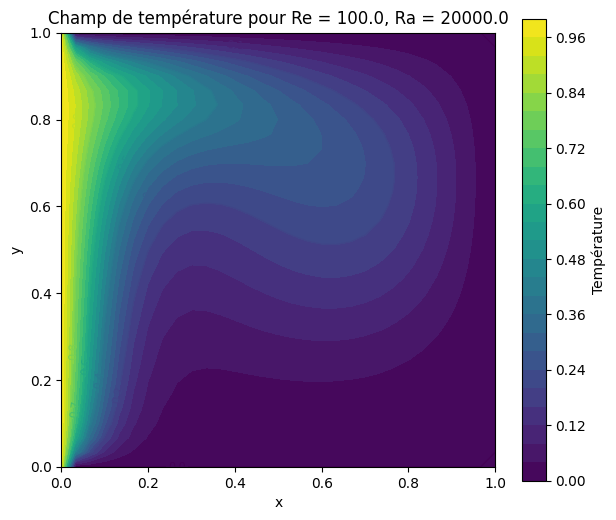

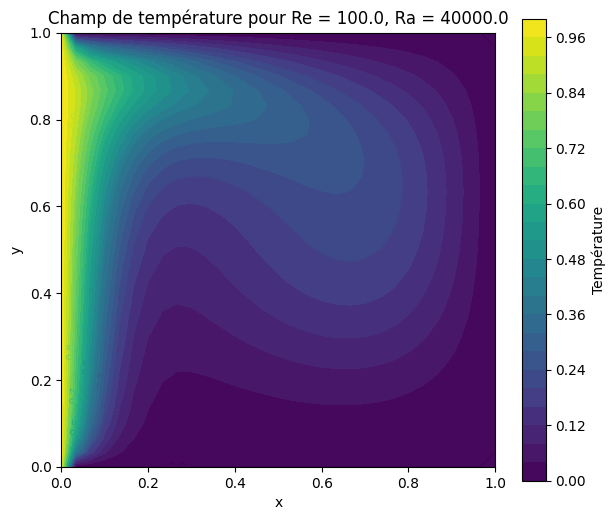

In [4]:
# 1. Préparation de la grille
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Sélection d'une itération (ex: la dernière enregistrée)
for i in range(len(U0_list)):
    for j in range(len(Ra_list)):
        nRa = len(Ra_list)
        T_plot = T_list[i*nRa + j]
        Re_plot = Re_list[i]
        Ra_plot = Ra_list[j]

        plt.figure(figsize=(7, 6))
        levels = 30

        cf = plt.contourf(X, Y, T_plot, levels=levels)   # champ coloré
        cs = plt.contour(X, Y, T_plot, levels=10, linewidths=0.8)  # isothermes
        plt.clabel(cs, inline=True, fontsize=8)

        plt.colorbar(cf, label="Température")
        plt.title("Champ de température pour Re = " + str(Re_plot) + ", Ra = " + str(Ra_plot))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, Lx)
        plt.ylim(0, Ly)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
